In [2]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud, STOPWORDS

In [3]:
#Importing the file
foods=pd.read_csv("Reviews.csv")
#foods.columns=['product/productId','review/userId','review/profileName','review/helpfulness','review/score','review/time']
print(foods.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
foods.shape

(568454, 10)

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [6]:
foods1=foods[['Id','ProductId','UserId','HelpfulnessNumerator','HelpfulnessDenominator','Score','Summary','Text']]
foods1.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
foods1_na=foods1.dropna()
foods1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568427 entries, 0 to 568453
Data columns (total 8 columns):
Id                        568427 non-null int64
ProductId                 568427 non-null object
UserId                    568427 non-null object
HelpfulnessNumerator      568427 non-null int64
HelpfulnessDenominator    568427 non-null int64
Score                     568427 non-null int64
Summary                   568427 non-null object
Text                      568427 non-null object
dtypes: int64(4), object(4)
memory usage: 39.0+ MB


In [8]:
foods1_na['Score'].unique()

array([5, 1, 4, 2, 3])

In [9]:
col_null=foods.isnull().sum()

In [10]:
foods1_na[foods1_na['Id'].duplicated()]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text


In [11]:
foods[foods.isnull().any(axis=1)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


In [12]:
def sentiment(x):
    if x['Score']>3:
        return 'Positive'
    elif x['Score']==3:
        return 'Neutral'
    else:
        return 'Negative'
    

In [13]:
foods1['Sentiment']= foods1.apply(sentiment, axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
foods1.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [15]:
foods1_na['Sentiment']= foods1_na.apply(sentiment, axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
foods1_na.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [17]:
foods1_na

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,0,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,Positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,0,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Positive
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,0,0,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Positive
8,9,B000E7L2R4,A1MZYO9TZK0BBI,1,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive
9,10,B00171APVA,A21BT40VZCCYT4,0,0,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Positive


In [18]:
foods1_na.iloc[30:50]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
30,31,B003F6UO7K,AFM0O9480F04W,0,0,5,Great machine!,"I have never been a huge coffee fan. However, ...",Positive
31,32,B003F6UO7K,A31OQO709M20Y7,0,1,5,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",Positive
32,33,B001EO5QW8,AOVROBZ8BNTP7,19,19,4,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,Positive
33,34,B001EO5QW8,A3PMM0NFVEJGK9,13,13,4,Good Instant,This is a good instant oatmeal from the best o...,Positive
34,35,B001EO5QW8,A2EB6OGOWCRU5H,9,9,5,Great Irish oatmeal for those in a hurry!,Instant oatmeal can become soggy the minute th...,Positive
35,36,B001EO5QW8,A2CI0RLADCRKPF,3,3,4,satisfying,"McCann's Instant Irish Oatmeal, Variety Pack o...",Positive
36,37,B001EO5QW8,A1MYS9LFFBIYKM,2,2,5,Love Gluten Free Oatmeal!!!,For those of us with celiac disease this produ...,Positive
37,38,B001EO5QW8,A3MGP2E1ZZ6GRB,1,1,5,it's oatmeal,"What else do you need to know? Oatmeal, instan...",Positive
38,39,B001EO5QW8,A2GHZ2UTV2B0CD,0,0,4,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,Positive
39,40,B001EO5QW8,AO80AC8313NIZ,0,0,5,Wife's favorite Breakfast,I ordered this for my wife as it was reccomend...,Positive


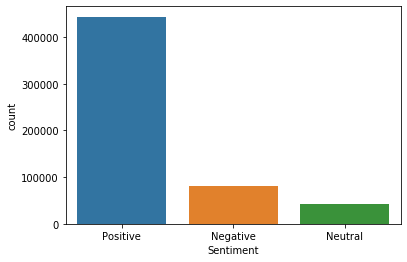

In [38]:
sns.countplot(foods1_na['Sentiment'])
plt.show()

In [19]:
foods1_na.groupby('ProductId')['Score'].mean()

ProductId
0006641040    4.351351
141278509X    5.000000
2734888454    3.500000
2841233731    5.000000
7310172001    4.751445
7310172101    4.751445
7800648702    4.000000
9376674501    5.000000
B00002N8SM    1.789474
B00002NCJC    4.500000
B00002Z754    5.000000
B00004CI84    4.486772
B00004CXX9    4.405128
B00004RAMS    3.633333
B00004RAMV    2.111111
B00004RAMX    3.640000
B00004RAMY    4.104651
B00004RBDU    3.842105
B00004RBDW    4.000000
B00004RBDZ    3.627119
B00004RYGX    4.486772
B00004S1C5    4.000000
B00004S1C6    4.590164
B000052Y74    3.600000
B00005344V    4.882353
B0000535LF    5.000000
B0000537KC    4.250000
B00005C2JE    5.000000
B00005C2M2    4.480000
B00005C2M3    3.285714
                ...   
B009NY1MC4    4.583333
B009O0U2SW    5.000000
B009O753WA    5.000000
B009O7B1I0    1.000000
B009O7DGEW    5.000000
B009OM65GI    5.000000
B009OM65H2    5.000000
B009OM66IU    5.000000
B009OY38SY    5.000000
B009P4KMZA    1.000000
B009PCDDO4    5.000000
B009PFJUF2    5.000000
B

In [20]:
foods1_na['Helpful %'] = np.where(foods1_na['HelpfulnessDenominator'] > 0, foods1_na['HelpfulnessNumerator'] / foods1_na['HelpfulnessDenominator'], -1)
foods1_na['% Upvote'] = pd.cut(foods1_na['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
foods1_na.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive,-1.0,Empty


Text(0.5, 1, 'How helpful users find among user scores')

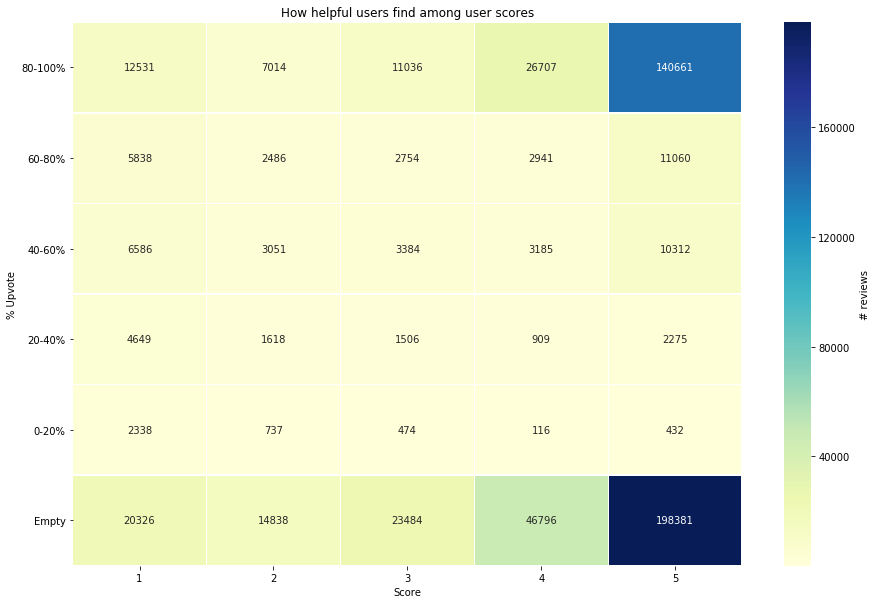

In [21]:
df_s = foods1_na.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [1]:
cluster = foods1_na.groupby("Score")["Summary"].apply(list)

NameError: name 'foods1_na' is not defined

In [30]:
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")

In [33]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

NameError: name 're' is not defined

In [32]:
cluster1["Summary_Clean"] = cluster1["Summary"].apply(cleanup)

NameError: name 'cleanup' is not defined

In [25]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [26]:
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review Score One")

KeyError: 'Summary_Clean'

In [27]:
show_wordcloud(cluster1["Summary_Clean"][1] , title = "Review Score Two")

KeyError: 'Summary_Clean'